[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zVvA5biJbri8-3mlLHdCPu-HiNzuWBW9?usp=sharing)

In [2]:
# install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 66.1 MB/s e

### Data loading and inspection

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task3/pollution_data.csv'

In [4]:
import pandas as pd

# Load the dataset
pollution_data = pd.read_csv(url)

# Display basic properties and the first few rows of the dataset
data_shape = pollution_data.shape
data_info = pollution_data.info()
data_head = pollution_data.head()

data_shape, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            7999 non-null   object 
 1   City                            7999 non-null   object 
 2   County                          7999 non-null   object 
 3   State                           7999 non-null   object 
 4   Population Staying at Home      7999 non-null   object 
 5   Population Not Staying at Home  7999 non-null   object 
 6   mil_miles                       7999 non-null   float64
 7   past_week_avg_miles             7999 non-null   float64
 8   latitude                        7999 non-null   float64
 9   longitude                       7999 non-null   float64
 10  o3_min                          7626 non-null   float64
 11  o3_max                          7626 non-null   float64
 12  o3_median                       76

((7999, 71),
          Date         City      County State Population Staying at Home  \
 0  2019-01-01  albuquerque  bernalillo    NM                   1,77,171   
 1  2019-01-01      atlanta      fulton    GA                   2,83,093   
 2  2019-01-01       austin      travis    TX                   2,68,732   
 3  2019-01-01    baltimore     baltimo    MD                   1,91,486   
 4  2019-01-01        boise         ada    ID                   1,05,237   
 
   Population Not Staying at Home  mil_miles  past_week_avg_miles   latitude  \
 0                       4,99,456  19.038463                  0.0  35.107209   
 1                       7,63,811  29.295609                  0.0  33.760109   
 2                       9,76,194  27.286079                  0.0  30.283333   
 3                       4,09,167  12.961132                  0.0  39.305833   
 4                       3,63,293  12.640954                  0.0  43.604545   
 
     longitude  ...  pm10_max  pm10_median  pm1

## Step 2: Data Cleaning


In [5]:
# Convert 'Date' column to datetime format
pollution_data['Date'] = pd.to_datetime(pollution_data['Date'])

# Convert 'Population Staying at Home' and 'Population Not Staying at Home' columns to numeric format
pollution_data['Population Staying at Home'] = pollution_data['Population Staying at Home'].str.replace(',', '').astype(float)
pollution_data['Population Not Staying at Home'] = pollution_data['Population Not Staying at Home'].str.replace(',', '').astype(float)

# Check the data types and null values again
data_info_updated = pollution_data.info()
data_head_updated = pollution_data.head()

data_info_updated, data_head_updated


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            7999 non-null   datetime64[ns]
 1   City                            7999 non-null   object        
 2   County                          7999 non-null   object        
 3   State                           7999 non-null   object        
 4   Population Staying at Home      7999 non-null   float64       
 5   Population Not Staying at Home  7999 non-null   float64       
 6   mil_miles                       7999 non-null   float64       
 7   past_week_avg_miles             7999 non-null   float64       
 8   latitude                        7999 non-null   float64       
 9   longitude                       7999 non-null   float64       
 10  o3_min                          7626 non-null   float64       
 11  o3_m

(None,
         Date         City      County State  Population Staying at Home  \
 0 2019-01-01  albuquerque  bernalillo    NM                    177171.0   
 1 2019-01-01      atlanta      fulton    GA                    283093.0   
 2 2019-01-01       austin      travis    TX                    268732.0   
 3 2019-01-01    baltimore     baltimo    MD                    191486.0   
 4 2019-01-01        boise         ada    ID                    105237.0   
 
    Population Not Staying at Home  mil_miles  past_week_avg_miles   latitude  \
 0                        499456.0  19.038463                  0.0  35.107209   
 1                        763811.0  29.295609                  0.0  33.760109   
 2                        976194.0  27.286079                  0.0  30.283333   
 3                        409167.0  12.961132                  0.0  39.305833   
 4                        363293.0  12.640954                  0.0  43.604545   
 
     longitude  ...  pm10_max  pm10_median  pm1

## Missing value handling with median imputation

In [6]:
# Impute missing values using median for the numerical columns
for column in pollution_data.select_dtypes(include=['float64']).columns:
    pollution_data[column].fillna(pollution_data[column].median(), inplace=True)

# Check if there are any more missing values
missing_values_count = pollution_data.isnull().sum()

missing_values_count[missing_values_count > 0]


Series([], dtype: int64)

## Outlier Detection


In [7]:
# Detecting outliers using IQR method

# List to store columns with detected outliers
columns_with_outliers = []

# Check for outliers in each numerical column
for column in pollution_data.select_dtypes(include=['float64']).columns:
    Q1 = pollution_data[column].quantile(0.25)
    Q3 = pollution_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if there are values outside of bounds
    if ((pollution_data[column] < lower_bound) | (pollution_data[column] > upper_bound)).any():
        columns_with_outliers.append(column)

columns_with_outliers


['Population Staying at Home',
 'Population Not Staying at Home',
 'mil_miles',
 'latitude',
 'longitude',
 'o3_min',
 'o3_max',
 'o3_median',
 'o3_variance',
 'o3_count',
 'pressure_min',
 'pressure_max',
 'pressure_median',
 'pressure_variance',
 'pressure_count',
 'pm25_min',
 'pm25_max',
 'pm25_median',
 'pm25_variance',
 'pm25_count',
 'humidity_max',
 'humidity_median',
 'humidity_variance',
 'humidity_count',
 'temperature_min',
 'temperature_max',
 'temperature_median',
 'temperature_variance',
 'temperature_count',
 'dew_min',
 'dew_max',
 'dew_median',
 'dew_variance',
 'dew_count',
 'no2_min',
 'no2_max',
 'no2_median',
 'no2_variance',
 'no2_count',
 'wind-speed_min',
 'wind-speed_max',
 'wind-speed_median',
 'wind-speed_variance',
 'wind-speed_count',
 'co_min',
 'co_max',
 'co_median',
 'co_variance',
 'co_count',
 'so2_min',
 'so2_max',
 'so2_median',
 'so2_variance',
 'so2_count',
 'pm10_min',
 'pm10_max',
 'pm10_median',
 'pm10_variance',
 'pm10_count',
 'wind-gust_min

## Handling outliers with capping approach

In [8]:
# Capping outliers using the IQR method

for column in columns_with_outliers:
    Q1 = pollution_data[column].quantile(0.25)
    Q3 = pollution_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    pollution_data[column] = pollution_data[column].clip(lower_bound, upper_bound)

# Check for outliers again after capping
columns_with_outliers_after_capping = []

for column in pollution_data.select_dtypes(include=['float64']).columns:
    Q1 = pollution_data[column].quantile(0.25)
    Q3 = pollution_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if there are values outside of bounds
    if ((pollution_data[column] < lower_bound) | (pollution_data[column] > upper_bound)).any():
        columns_with_outliers_after_capping.append(column)

columns_with_outliers_after_capping


[]

## Data visualization

<ipython-input-9-873a166e5b2e>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=pollution_data, x='Date', y='o3_median', ci=None)


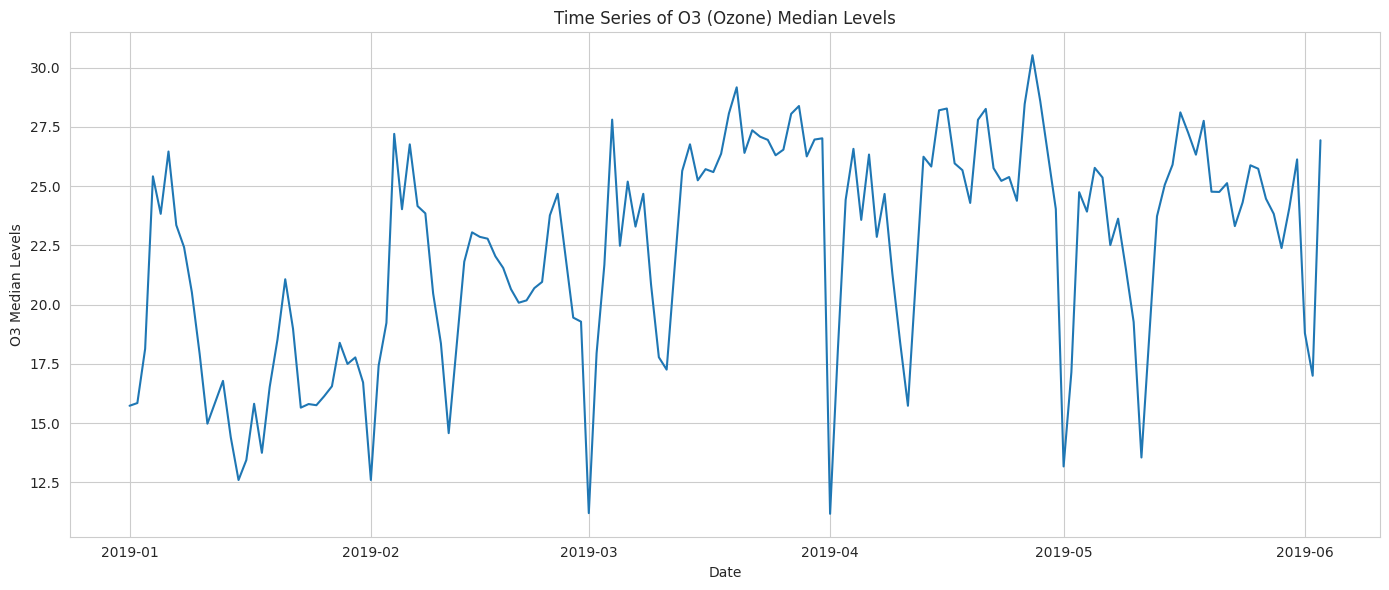

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set_style("whitegrid")

# Time Series Plot for O3 (ozone) median levels
plt.figure(figsize=(14, 6))
sns.lineplot(data=pollution_data, x='Date', y='o3_median', ci=None)
plt.title('Time Series of O3 (Ozone) Median Levels')
plt.xlabel('Date')
plt.ylabel('O3 Median Levels')
plt.tight_layout()
plt.show()


## Histograms

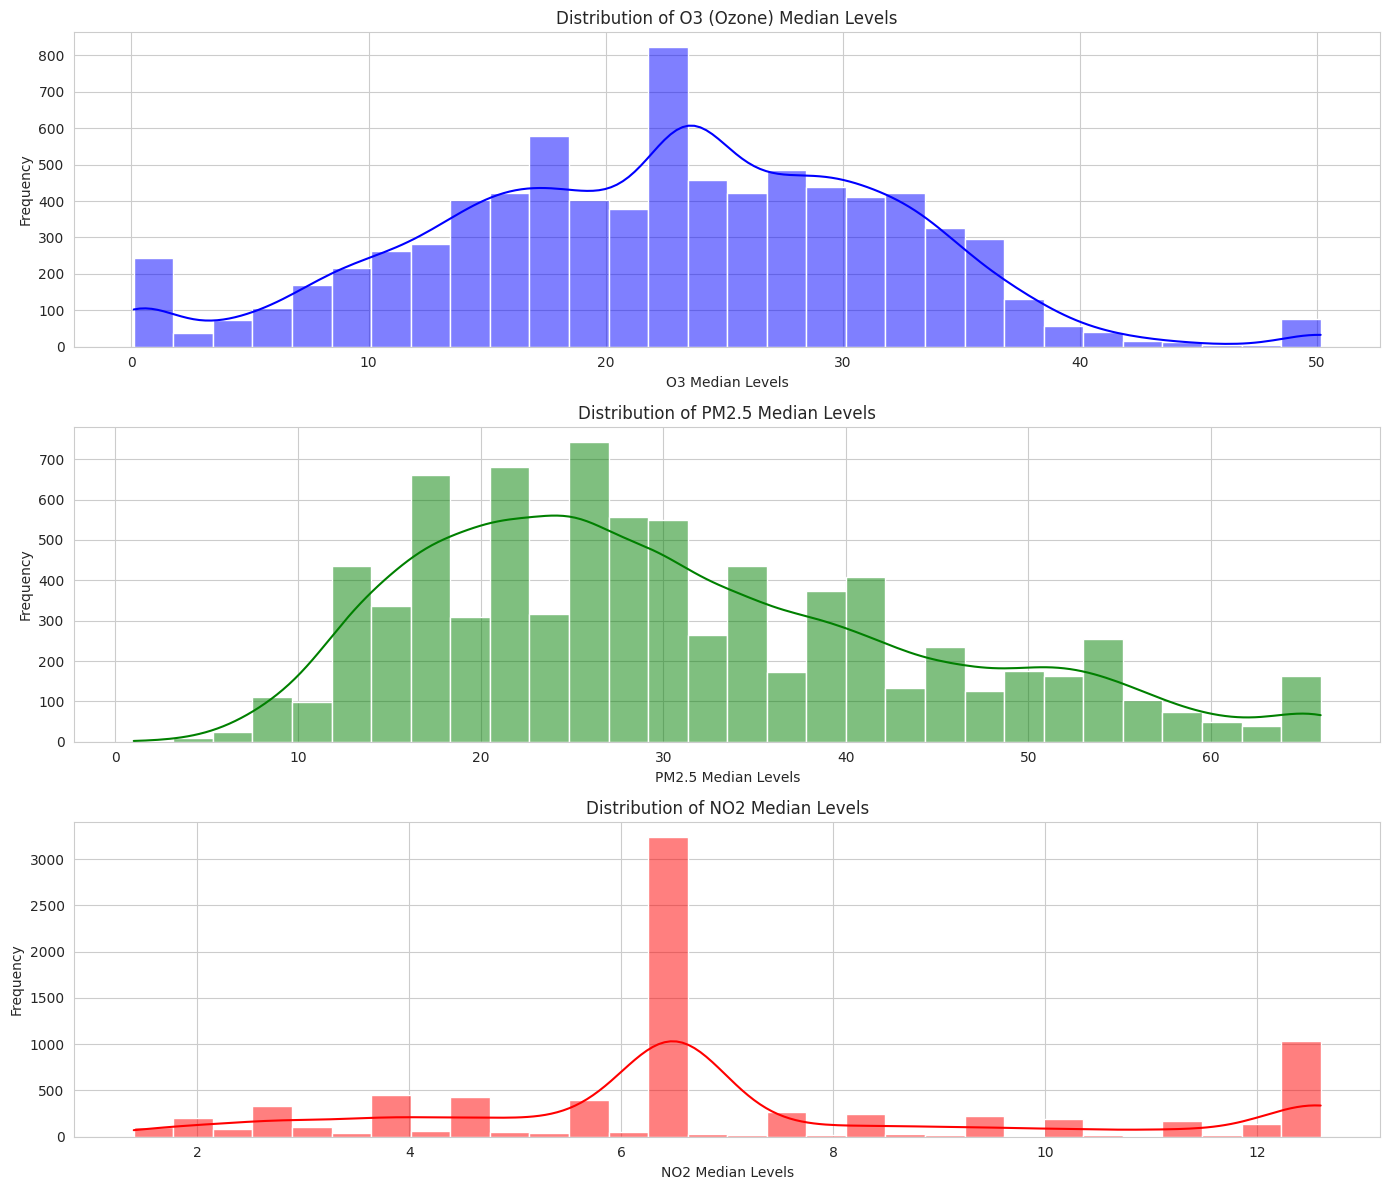

In [10]:
# Histograms for median levels of O3, PM2.5, and NO2

fig, ax = plt.subplots(3, 1, figsize=(14, 12))

# O3 Histogram
sns.histplot(pollution_data['o3_median'], ax=ax[0], bins=30, kde=True, color='blue')
ax[0].set_title('Distribution of O3 (Ozone) Median Levels')
ax[0].set_xlabel('O3 Median Levels')
ax[0].set_ylabel('Frequency')

# PM2.5 Histogram
sns.histplot(pollution_data['pm25_median'], ax=ax[1], bins=30, kde=True, color='green')
ax[1].set_title('Distribution of PM2.5 Median Levels')
ax[1].set_xlabel('PM2.5 Median Levels')
ax[1].set_ylabel('Frequency')

# NO2 Histogram
sns.histplot(pollution_data['no2_median'], ax=ax[2], bins=30, kde=True, color='red')
ax[2].set_title('Distribution of NO2 Median Levels')
ax[2].set_xlabel('NO2 Median Levels')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Correlation Heatmap

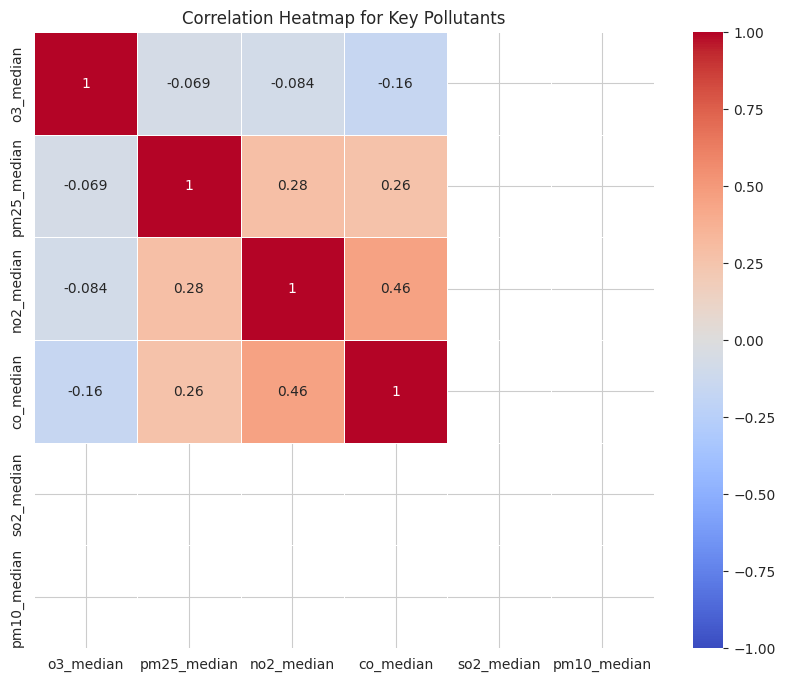

In [11]:
# Correlation matrix for the main pollutants
pollutant_columns = ['o3_median', 'pm25_median', 'no2_median', 'co_median', 'so2_median', 'pm10_median']
correlation_matrix = pollution_data[pollutant_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Key Pollutants')
plt.show()


## Feature Engineering

In [12]:
# Extracting Temporal Features from the 'Date' column
pollution_data['Year'] = pollution_data['Date'].dt.year
pollution_data['Month'] = pollution_data['Date'].dt.month
pollution_data['Day'] = pollution_data['Date'].dt.day
pollution_data['Day_of_Week'] = pollution_data['Date'].dt.dayofweek

# Creating Pollutant Ratio feature for PM2.5 to PM10
pollution_data['PM25_to_PM10_ratio'] = pollution_data['pm25_median'] / pollution_data['pm10_median']

# Creating Aggregated Features: Mean levels of O3 for each city
city_o3_mean = pollution_data.groupby('City')['o3_median'].transform('mean')
pollution_data['City_O3_Mean'] = city_o3_mean

# Displaying the first few rows with the new features
pollution_data[['Date', 'Year', 'Month', 'Day', 'Day_of_Week', 'PM25_to_PM10_ratio', 'City_O3_Mean']].head()


,Date,Year,Month,Day,Day_of_Week,PM25_to_PM10_ratio,City_O3_Mean
0,2019-01-01,2019,1,1,1,1.785714,32.344966
1,2019-01-01,2019,1,1,1,2.214286,25.476510
2,2019-01-01,2019,1,1,1,2.714286,23.379195
3,2019-01-01,2019,1,1,1,0.928571,25.672483
4,2019-01-01,2019,1,1,1,0.928571,22.412081


 Engineered new features:

Temporal Features:
Year, Month, Day, and Day_of_Week have been extracted from the Date column.

Pollutant Ratios:
PM25_to_PM10_ratio: This feature provides the ratio of PM2.5, median levels to PM10 median levels.

Aggregated Features:
City_O3_Mean: This feature provides the average O3(ozone) level for each city.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

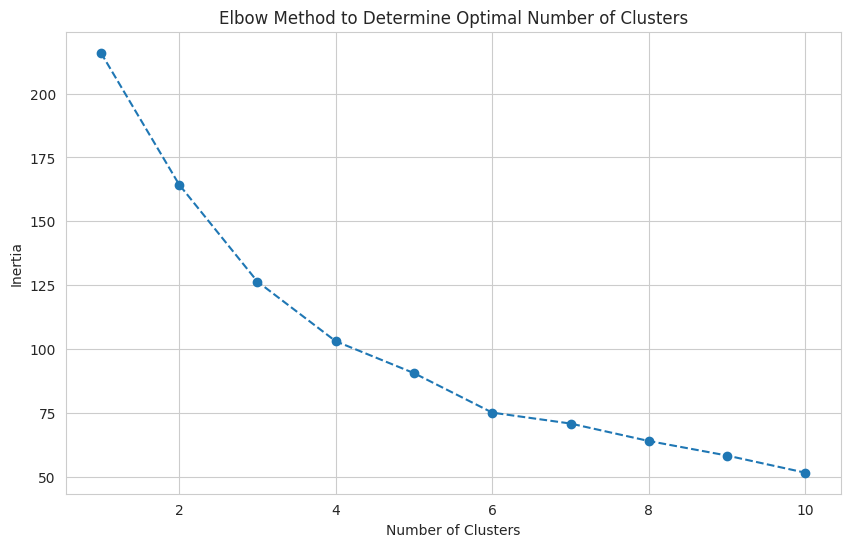

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting features for clustering
features_for_clustering = ['o3_median', 'pm25_median', 'no2_median', 'co_median', 'so2_median', 'pm10_median']
data_for_clustering = pollution_data.groupby('City')[features_for_clustering].mean().reset_index()

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering[features_for_clustering])

# Using the Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()


In [14]:
from sklearn.ensemble import IsolationForest

# Features for anomaly detection
features_for_anomaly = ['o3_median', 'pm25_median', 'no2_median', 'co_median', 'so2_median', 'pm10_median']
data_for_anomaly = pollution_data[features_for_anomaly]

# Initializing and fitting the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=0)  # 5% of the data is considered as anomalies
anomalies = iso_forest.fit_predict(data_for_anomaly)

# Mapping the predicted outcomes to 'Normal' (1) and 'Anomaly' (-1)
pollution_data['Anomaly'] = anomalies

# Filtering the detected anomalies
anomaly_data = pollution_data[pollution_data['Anomaly'] == -1]

# Displaying a sample of detected anomalies
anomaly_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Date,City,County,State,Population Staying at Home,Population Not Staying at Home,mil_miles,past_week_avg_miles,latitude,longitude,...,wind-gust_variance,wind-gust_count,pp_feat,Year,Month,Day,Day_of_Week,PM25_to_PM10_ratio,City_O3_Mean,Anomaly
16,2019-01-01,fresno,fresno,CA,241319.0,750042.0,28.155253,0.0,36.756833,-119.783333,...,32.60,57.0,0.000000,2019,1,1,1,4.714286,23.304027,-1
22,2019-01-01,jacksonville,duval,FL,210989.0,736288.0,25.409460,0.0,30.316154,-81.644231,...,86.61,88.0,2.572690,2019,1,1,1,3.785714,13.066443,-1
37,2019-01-01,portland,multnomah,OR,217182.0,592216.0,22.076763,0.0,45.517544,-122.648772,...,8.55,115.0,1.035099,2019,1,1,1,4.071429,8.577703,-1
41,2019-01-01,sacramento,sacramento,CA,361294.0,1174971.0,46.980984,0.0,38.569902,-121.467157,...,223.49,70.0,5.812841,2019,1,1,1,0.928571,0.100000,-1
49,2019-01-01,seattle,king,WA,503540.0,1722797.0,64.907174,0.0,47.590794,-122.325714,...,18.24,217.0,0.000000,2019,1,1,1,4.500000,19.001351,-1


In [15]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(pollution_data, target = 'o3_variance', session_id = 333)

,Description,Value
0,Session id,333
1,Target,o3_variance
2,Target type,Regression
3,Original data shape,"(7999, 78)"
4,Transformed data shape,"(7999, 80)"
5,Transformed train set shape,"(5599, 80)"
6,Transformed test set shape,"(2400, 80)"
7,Numeric features,73
8,Date features,1
9,Categorical features,3


In [16]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,129.9972,41653.9037,203.9381,0.9347,0.4036,0.2845,2.3630
et,Extra Trees Regressor,133.2531,44309.6659,210.3080,0.9306,0.3235,0.2605,3.9230
xgboost,Extreme Gradient Boosting,138.3613,45678.1059,213.4985,0.9283,0.4787,0.3002,0.9130
rf,Random Forest Regressor,137.0170,47773.3217,218.3800,0.9252,0.3015,0.2524,8.5260
gbr,Gradient Boosting Regressor,145.5052,48879.0254,220.9044,0.9234,0.4796,0.3219,3.1430
lasso,Lasso Regression,223.2771,87774.0092,296.0390,0.8627,0.7809,0.8972,0.3080
ridge,Ridge Regression,223.4009,87802.2267,296.0812,0.8627,0.7806,0.8973,0.1610
lr,Linear Regression,223.5054,87889.3870,296.2288,0.8625,0.7846,0.8984,0.8000
br,Bayesian Ridge,223.5459,88080.9842,296.5701,0.8622,0.7878,0.8973,0.1180
llar,Lasso Least Angle Regression,223.5973,88133.6344,296.6644,0.8621,0.7907,0.9004,0.1120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [17]:
final = create_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,127.6596,38541.9423,196.3210,0.9398,0.4261,0.3160
1,127.0287,38292.5534,195.6848,0.9369,0.4258,0.2803
2,126.1326,39729.0584,199.3215,0.9407,0.3349,0.2580
3,131.1735,42261.2182,205.5753,0.9312,0.3516,0.2802
4,134.6028,45214.2445,212.6364,0.9345,0.4020,0.3212
5,132.3380,42265.5915,205.5860,0.9357,0.3735,0.2442
6,142.6435,49671.6189,222.8713,0.9235,0.4960,0.2790
7,129.9958,39294.7277,198.2290,0.9373,0.4420,0.3030
8,124.0281,40900.3190,202.2383,0.9288,0.3590,0.2689


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

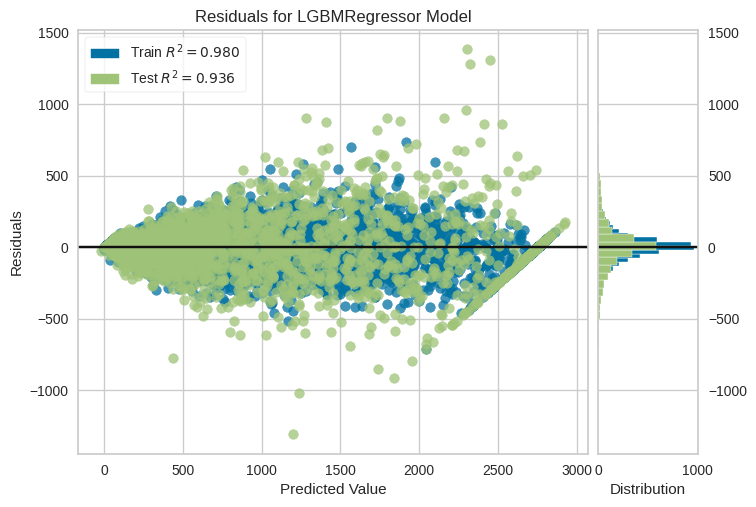

In [18]:
plot_model(final)